# Lab #2: Probability, Distributions, and Statistical Questions
#### Aidan Berres
#### Physics 434
#### 10/18/20
---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sympy as sp

## Problem 1
I chose my X value to be 7 and my X value to be 10. In this problem we are going to be looking at how convolution can be used to sum and average probabilities of a distribution. We are using Poisson distributions which are distrete distributions with non-continuous values. The two parameters I am setting (X an Y) determine the daily average cosmic-ray background, and the average number of gamma-rays emitted by a simulated source. 

In [5]:
stats.poisson.rvs(mu=1,size=100000)

array([1, 1, 2, ..., 1, 0, 0])

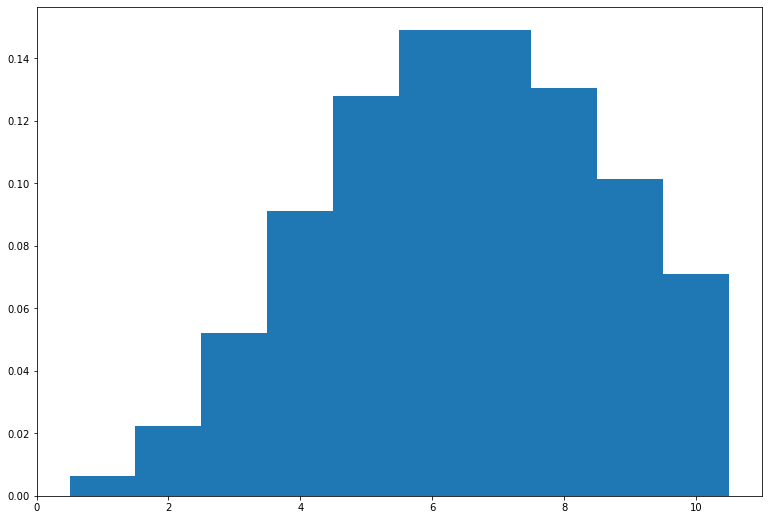

In [37]:
fig, ax = plt.subplots(1,1,figsize=(13,9))
X=7
Y=10
x=np.arange(1,11)
ax.bar(x,stats.poisson.pmf(x,mu=X),width=1);

## 1. A)
Here we are using convolution to sum the original probabilities over multiple days.

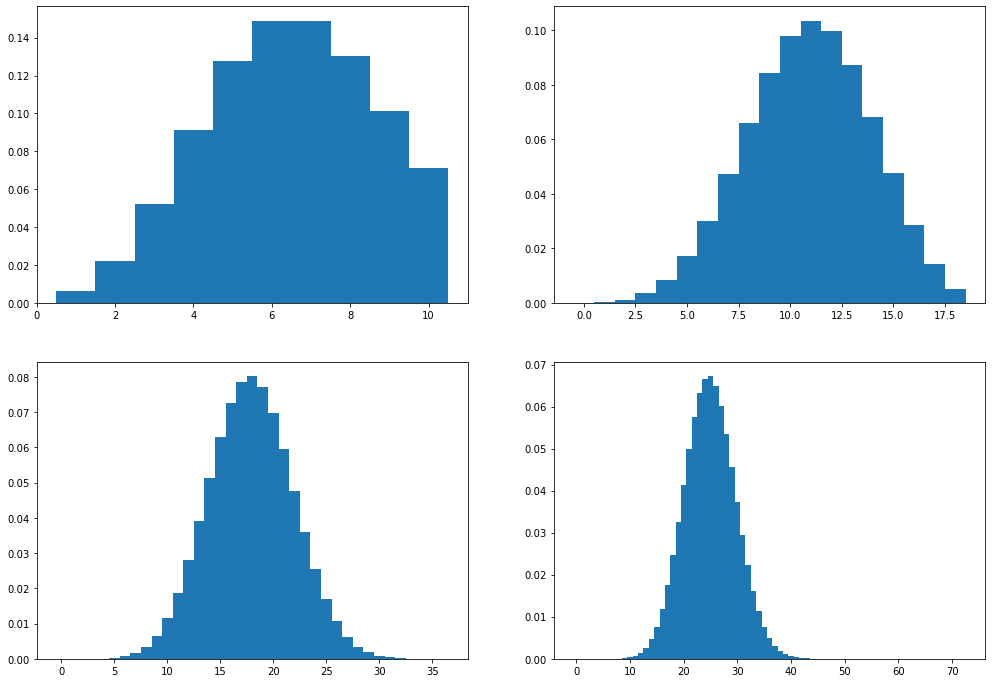

In [38]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
X=7
Y=10
ax=ax.flatten()
x=np.arange(1,10+1)
ef=stats.poisson.pmf(x,mu=X)
ax[0].bar(x,ef,width=1)
for i in range(1,4):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    ax[i].bar(x,ef,width=1)

We can see as the days summed increases, that the distribution gets wider and shorter since we are adding more data points to the distributions and that more of the points are grouped near an average.

## 1. B)


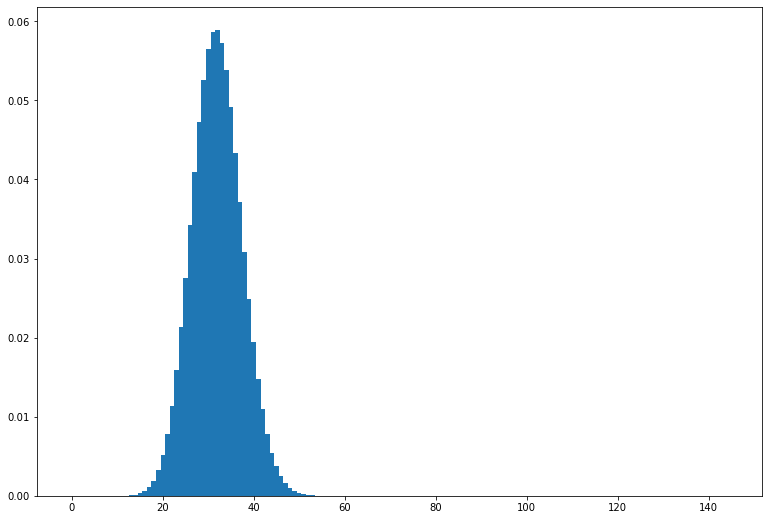

In [36]:
fig, ax = plt.subplots(1,1,figsize=(13,9))
X=7
Y=10
#ax=ax.flatten()
x=np.arange(1,Y+1)
ef=stats.poisson.pmf(x,mu=X)
#ax[0].bar(x,ef,width=1)
for i in range(1,5):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    #ax[i].bar(x,ef,width=1)
#ax.set_xlim(50,60)
ax.bar(x,ef,width=1);

Explain why this makes sense from a mathematical and conceptual point of view.




## 1. C)
Here we are using convolution to average the original probabilities for multiple days.

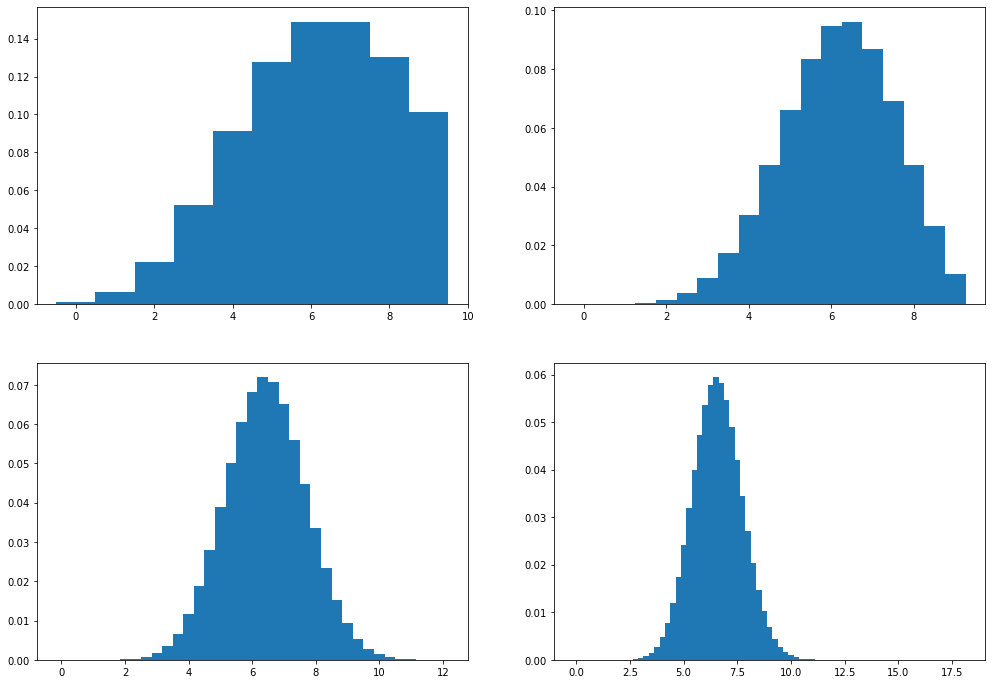

In [57]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
X=7
Y=10
ax=ax.flatten()
x=np.arange(10)
ef=stats.poisson.pmf(x,mu=X)
ax[0].bar(x,ef,width=1)
for i in range(1,4):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    #print(np.sum(ef*x))
    ax[i].bar(x/(i+1),ef,width=1/(i+1))

Discuss this in relation to both B) and the central limit theorem.

## 1. D)
For this part I chose 5 days as my number of days. Since we have a average gamma-ray emitted value of 10, we can assume we saw gamma-rays Y*N = 50 from our source. Furthermore, we have to multiply our daily cosimic-ray backgorund by the number of days so we are looking at the correct distribution for that day.

In [134]:
Y=10
N=5
yn=Y*N
m1=1-stats.poisson.cdf(yn,N*X)
siggy=stats.norm.ppf(1-m1)
siggy

2.481908839676195

We find our sigma value to be 2.48

---
## Problem 2
I chose a Rayleigh Distribution. For this portion we are averaging a skewed distribution multiple times to see how averaging over more observing intervals changes the distribution.

(array([ 43., 149., 206., 295., 351., 408., 437., 483., 517., 520., 536.,
        536., 551., 539., 508., 440., 425., 420., 363., 281., 347., 275.,
        222., 214., 157., 151., 125., 117.,  65.,  61.,  62.,  45.,  43.,
         25.,  25.,  20.,  10.,  10.,   3.,   7.,   3.,   1.,   0.,   1.,
          2.,   0.,   0.,   0.,   0.,   1.]),
 array([0.01686881, 0.10697282, 0.19707684, 0.28718086, 0.37728487,
        0.46738889, 0.55749291, 0.64759692, 0.73770094, 0.82780496,
        0.91790898, 1.00801299, 1.09811701, 1.18822103, 1.27832504,
        1.36842906, 1.45853308, 1.54863709, 1.63874111, 1.72884513,
        1.81894914, 1.90905316, 1.99915718, 2.08926119, 2.17936521,
        2.26946923, 2.35957324, 2.44967726, 2.53978128, 2.6298853 ,
        2.71998931, 2.81009333, 2.90019735, 2.99030136, 3.08040538,
        3.1705094 , 3.26061341, 3.35071743, 3.44082145, 3.53092546,
        3.62102948, 3.7111335 , 3.80123751, 3.89134153, 3.98144555,
        4.07154956, 4.16165358, 4.2517576 , 4.

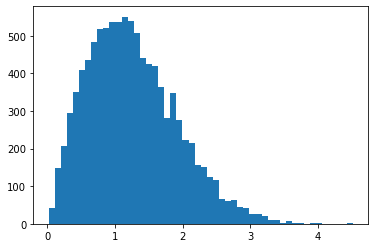

In [168]:
exx=np.arange(10000)
eff=stats.rayleigh.rvs(loc=0,scale=1,size=10000,random_state=42069)
plt.hist(eff,bins=50)

## 2. A)

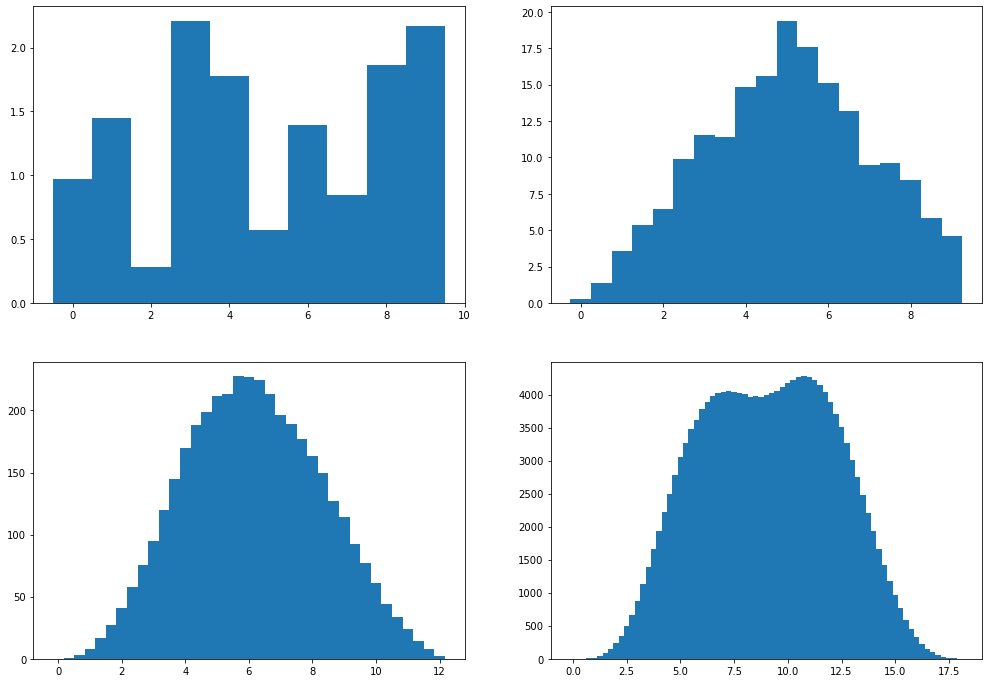

In [165]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
ax=ax.flatten()
x=np.arange(10)
eff=stats.rayleigh.rvs(size=len(x))
ax[0].bar(x,eff,width=1)
for i in range(1,4):
    eff=np.convolve(eff,stats.rayleigh.rvs(loc=0,scale=1,size=len(x),random_state=42069))
    x=np.arange(len(eff))
    #print(np.sum(ef*x))
    ax[i].bar(x/(i+1),eff,width=1/(i+1))

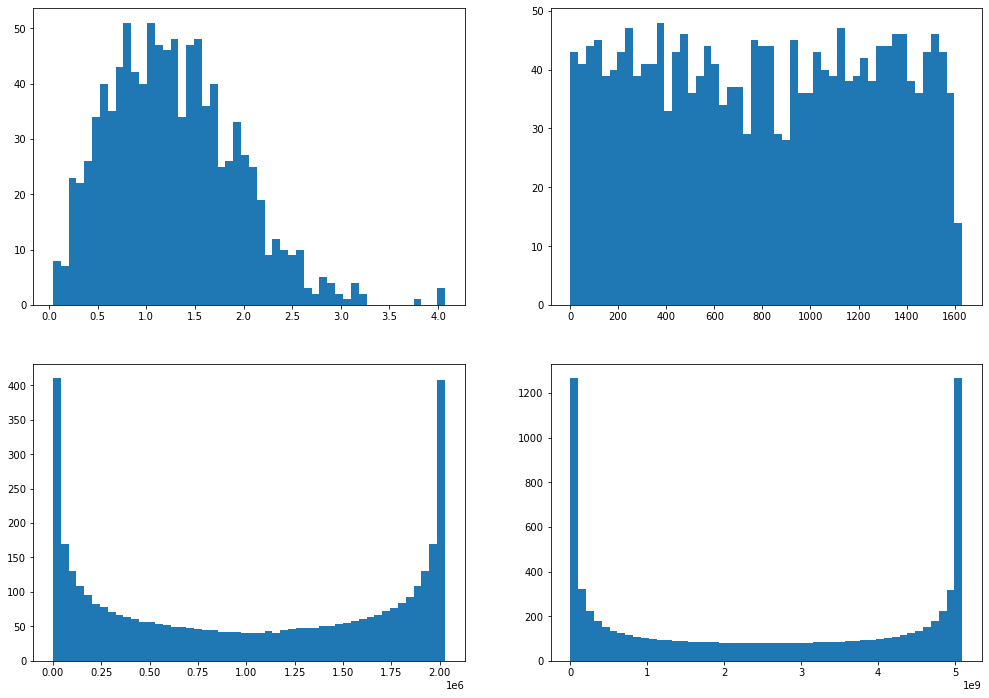

In [170]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
ax=ax.flatten()
x=np.arange(1000)
eff=stats.rayleigh.rvs(size=len(x))
ax[0].hist(eff,bins=50)
for i in range(1,4):
    eff=np.convolve(eff,stats.rayleigh.rvs(loc=0,scale=1,size=len(x),random_state=42069))
    x=np.arange(len(eff))
    #print(np.sum(ef*x))
    ax[i].hist(eff,bins=50)

# USE THIS PLOT *see below*

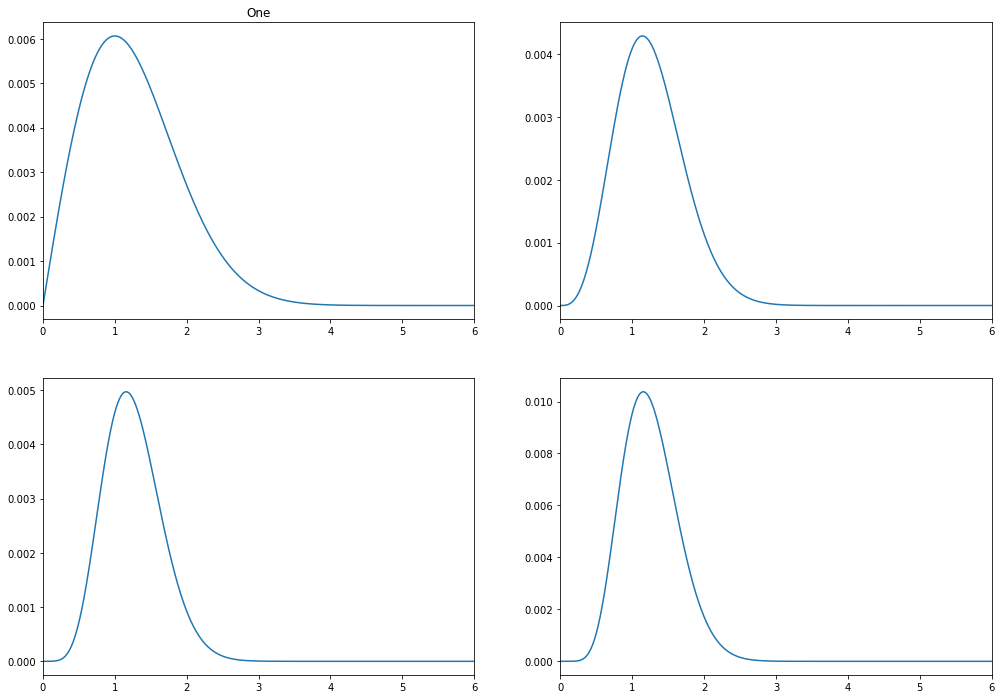

In [205]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
ax=ax.flatten()
x=np.linspace(0,10,1000)
eff=stats.rayleigh.pdf(x)/100
ax[0].set_title('One')
ax[0].set_xlim(0,6)
ax[0].plot(x,eff)
# Will probably change here
for i in range(1,4):
    #ax[i].set_yscale('log')
    eff=np.convolve(eff,stats.rayleigh.pdf(x)/100)
    x=np.linspace(0,10,len(eff))
    #print(np.sum(ef*x))
    ax[i].set_xlim(0,6)
    ax[i].plot(x,eff)

## 2. B)
It seems after a few averaging intervals that it has less of a skew and is getting taller. It is seeming to approach a Gaussian distribution slowly since...

## Problem 3

In this part we are using pixel counts and Gaussian distributions to find our signal location in a large amount of pixels. Later we will see how the probability of many pixels can help us find a significance of a signal from an unknown pixel location.

## Version 1

## A)

In [69]:
w=4.20
sn=6.9
pr= 1-stats.norm.cdf(sn,scale=w)
print(f'Probability of {pr}')
sig=stats.norm.ppf(1-pr)
print(f"Sigma of {sig}")

Probability of 0.05020624699305143
Sigma of 1.6428571428571426


Can you claim a discovery (traditionally 5-sigma or more)? No

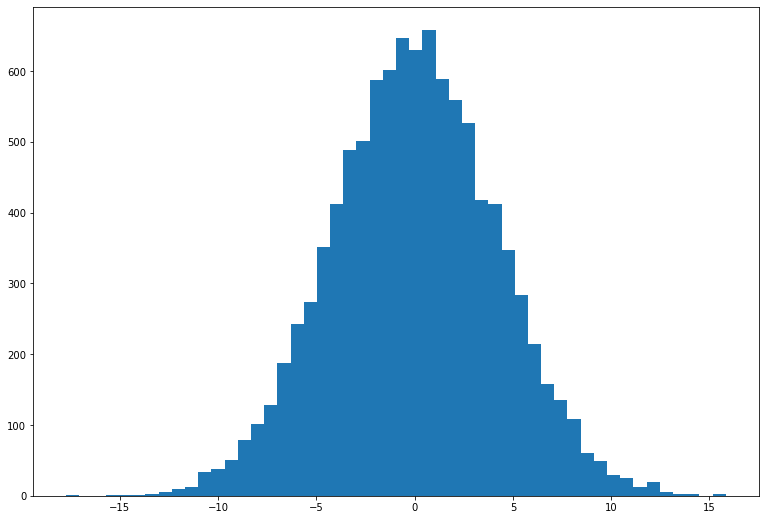

In [129]:
w=4.2069
sn=15
fig, ax = plt.subplots(1,1,figsize=(13,9))
ax.hist(stats.norm.rvs(scale=w,size=10000),bins=50);

## Version 2

## B)

(Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

In [70]:
stats.norm.ppf(0.0001,scale=w)

-15.619869238913859

In [75]:
stats.norm.ppf(1-0.0001,scale=w)

15.619869238913978

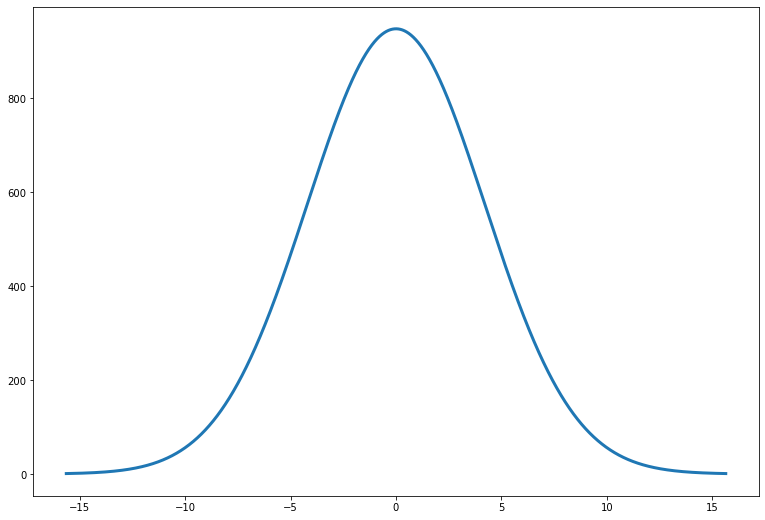

In [197]:
fig, ax = plt.subplots(1,1,figsize=(13,9))
ecks=np.linspace(stats.norm.ppf(0.0001,scale=w),stats.norm.ppf(1-0.0001,scale=w),int(10e3))
ax.plot(ecks,stats.norm.pdf(ecks,scale=w)*10e3,linewidth=3);

## C)
This needs to be fixed

In [130]:
#How do you feed this area back into the ppf?
prob1= (1 - stats.norm.cdf(sn,scale=w))*10000
sig2=stats.norm.ppf(1-prob1)
sig2

nan

## Problem 4

## 4. A)

In [216]:
sig5=1-stats.norm.cdf(5)
sosig=stats.norm.ppf(1-sig5,scale=w)
sosig

21.034499999874534

## 4. B)

In [217]:
stats.norm.ppf(1-sig5/10e3,scale=w)

27.557456153604505

## 4. C)
Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k.

Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

The signal must be 27/21 $\approx$ 1.3 times brighter for discovery if we use a trials factor of 10k. The sensitivity penalty is so low since the wings of the distribution are small and that when you move to larger values the height of the distribution does not change as drastically, like between the center and the wings of a Gaussian curve, where the values change drastically due to the slope.

In [213]:
27.512257444944954/21.034499999874534

1.3079587080800141

## 4. D)
If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

As we can see an increase in magnitude only resulted in a 0.07 times increase between the original and factored distributions sensitivity threshold. This small increase can also be attributed to the wings small slope, as discussed in part C. 

In [218]:
sig5=1-stats.norm.cdf(5)
sosig=stats.norm.ppf(1-sig5,scale=w)
sosig

21.034499999874534

In [220]:
stats.norm.ppf(1-sig5/10e4,scale=w)

28.96926977506177

In [221]:
28.96926977506177/sosig

1.3772264506042247